### Test the Girwan-Newman from networkx
- only in the development version, from github

---


In [1]:
import networkx as nx
%matplotlib inline

#### Load my benchmark graph creator

In [2]:
import sys
sys.path.append('../my_modules/')
from girwan_newman_benchmark import create_GN_benchmark_graph, evaluate_partition

#### Load the girwan newman from netwrokx

#### Run it

- it take some minutes to finish
- After 3 cuts, (4 partitions) the results is good

In [3]:
from networkx.algorithms.community import girvan_newman
test_g,test_g_partition=create_GN_benchmark_graph(k_in=14)
gn_test_res=girvan_newman(test_g)
evaluate_partition(gn_test_res[2])

1.0

### Write my own version which stops at 4 partitions and returns that
- for speed
- for cases when starting graph is already partitioned

In [4]:
def argmax(in_list):
    return in_list.index(max(in_list)) 
    
def my_gn_algorithm_4_benchmark(input_g):
    
    #create a local copy, the graph will be changed
    g=nx.Graph(input_g)
    
    #check for number of components
    if(nx.number_connected_components(g) > 4 ):
        print "Too many components "
        raise Exception
        
    #do the algorithm
    while(nx.number_connected_components(g) < 4 ):
        #get betweenness centralities
        bc=nx.edge_betweenness_centrality(g)
        #remove highest
        g.remove_edge( *bc.keys()[ argmax(bc.values())])
        
    return [list(nodes) for nodes in nx.connected_component_subgraphs(g)]

In [5]:
test_g,test_g_partition=create_GN_benchmark_graph(k_in=11)
gn_test_res=my_gn_algorithm_4_benchmark(test_g)
evaluate_partition(gn_test_res)

1.0

----

## For real networks, we have to select the number of partitions: Modularity

#### Calculate modularity for each level

- with the community module
    - http://perso.crans.org/aynaud/communities/index.html

In [6]:
from community import modularity
def my_modularity(nx_gn_output_level,test_g):
    partition=dict()
    for partitions,i in zip(nx_gn_output_level,range(len(nx_gn_output_level))):
        for node in partitions:
            partition[node]=i
    return modularity(partition,test_g)

In [8]:
test_g,test_g_partition=create_GN_benchmark_graph(k_in=14)
gn_test_res=girvan_newman(test_g)
mods=[my_modularity(x,test_g) for x in gn_test_res]

### Modularity is highest after the 3rd cut, good

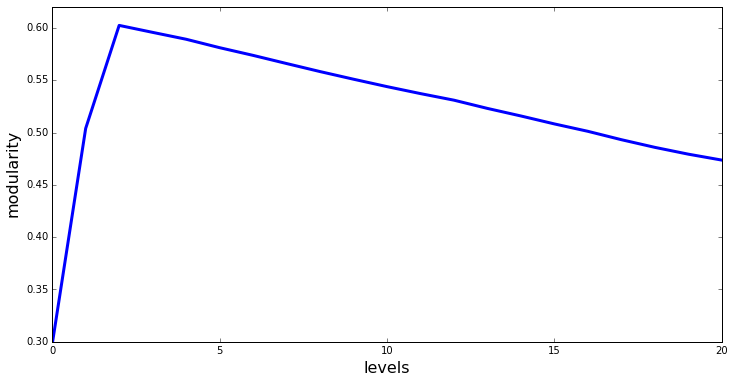

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots()
fig.set_size_inches(12,6)
ax.plot(mods,lw=3)
ax.set_xlim(0,20)
ax.set_ylim(0.3,0.62)
ax.set_xlabel('levels',fontsize=16)
dump=ax.set_ylabel('modularity',fontsize=16)

### Define a wrapper for GN, which selects the level based on modularity

In [10]:
from networkx.algorithms.community import girvan_newman
from community import modularity

def gn_best_partition(graph):
    
    #do all the cuts
    all_levels=girvan_newman(graph)
    
    #calculate modularity for all levels
    level_mods=[nx_gn_output_level_modularity(level,graph) for level in all_levels]
    
    #return the level with the highest modularity
    return all_levels[level_mods.index(max(level_mods))]

    
def nx_gn_output_level_modularity(nx_gn_output_level,test_g):
        partition=dict()
        for partitions,i in zip(nx_gn_output_level,range(len(nx_gn_output_level))):
            for node in partitions:
                partition[node]=i
        return modularity(partition,test_g)   

In [11]:
new_test_g,test_g_partition=create_GN_benchmark_graph(k_in=14)
best_res=gn_best_partition(new_test_g)

In [12]:
evaluate_partition(best_res)

1.0